In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

In [ ]:
# Read Image 
image = cv2.imread("./data/whitehorse.jpeg")
displayColorImage(image, "Original Image")
  

In [ ]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")


In [ ]:
#Remove noise
blur = cv2.GaussianBlur(gray,(7,7),0)
displayGrayScaleImage(blur, "After removing noise")

### Threshold Inverse

In [ ]:
#threshold inverse
# If pixel value is > 95, pixel value =0 else pixel value 255
(T, thresholdInverse) = cv2.threshold(blur, 95, 255, cv2.THRESH_BINARY_INV)
invwithblur = cv2.medianBlur(thresholdInverse,15,0)
displayGrayScaleImage(invwithblur, "After Threshold Inverse operation")


### Simple Threshold

In [ ]:
#threshold 
# If pixel value is > 95, pixel value = 255 else pixel value 0
(T, threshold) = cv2.threshold(blur,100, 255, cv2.THRESH_BINARY)
threshwithblur = cv2.medianBlur(threshold,15,0)
displayGrayScaleImage(threshwithblur, "After Threshold  operation")

### Masking

In [ ]:
#masking to extact forground
masked = cv2.bitwise_and(image, image, mask=threshold)
maskwithblur = cv2.medianBlur(masked,15,0)
displayColorImage(maskwithblur, "after masking")

In [ ]:
#masking to extract background
masked = cv2.bitwise_and(image, image, mask=thresholdInverse)
maskwithblur = cv2.medianBlur(masked,15,0)
displayColorImage(maskwithblur, "after masking with inverse threshold")

### Otsu's thresholding

In [ ]:
(T, thresholdInverse) = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
threshwithblur = cv2.medianBlur(thresholdInverse,15,0)
displayGrayScaleImage(threshwithblur, "After Otsu's Threshold  operation")


In [ ]:
print("dynamic threshold determined by Otsu's thrsholding is {}".format(T))

### Adaptive thresholding

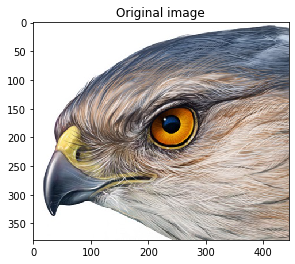

In [26]:
# Read Image 
#image = cv2.imread("./data/lena.jpg")
image = cv2.imread("./data/hawk.jpg")
displayColorImage(image, "Original image")


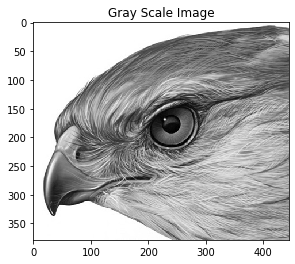

In [27]:
# Convert it to grayscale
gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
displayGrayScaleImage(gray, "Gray Scale Image")

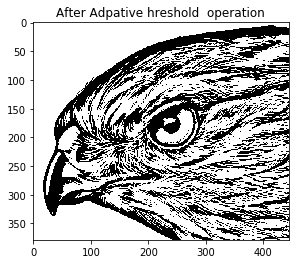

In [28]:
threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45, 5)
displayGrayScaleImage(threshold, "After Adpative hreshold  operation")

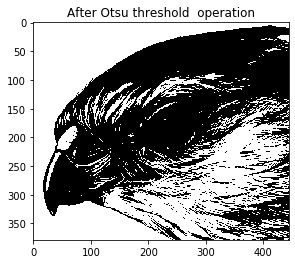

In [29]:
(T, threshold) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#threshwithblur = cv2.medianBlur(threshold,25,0)
displayGrayScaleImage(threshold, "After Otsu threshold  operation")